In [39]:
def format_regex(regex):
    """
    Phase 1: Expand [...] into group (a|b|c)
    Phase 2: Insert explicit concatenation symbol '&' 
    """
    all_operators = ['|', '?', '+', '*', '^']
    binary_operators = ['^', '|']
    res = ""
    
    # --- Part 1: Handle [...] expansion ---
    # We will rebuild the string replacing [abc] with (a|b|c)

    i = 0
    while i < len(regex):
        c = regex[i]
        if c == '[':
            res += '('
            i += 1
            first = True
            while i < len(regex) and regex[i] != ']':
                if not first:
                    res += '|'
                res += regex[i]
                first = False
                i += 1
            res += ')'
        else:
            res += c
        i += 1
        
    # --- Part 2: Insert Explicit Concatenation '&' ---
    # We need '&' between:
    # 1. Literal & Literal (a b -> a&b)
    # 2. Literal & Open Paren (a ( -> a&()
    # 3. Close Paren & Literal () a -> )&a)
    # 4. Star/Plus/? & Literal (* a -> *&a)
    # Note: '.' (wildcard) is treated strictly as a Literal here.
    
    formatted_regex = ""
    for i in range(len(res)):
        c1 = res[i]
        formatted_regex += c1
        
        if i + 1 < len(res):
            c2 = res[i+1]
            
            # Define what counts as a "character" (including wildcard .)
            is_c1_op = c1 in all_operators or c1 == '('
            is_c2_op = c2 in all_operators or c2 == ')'
            
            # Logic: If C1 is NOT a standard operator (or is a closing paren/unary op)
            # AND C2 is NOT a standard operator (or is an opening paren)
            # THEN add concatenation.
            
            # Left side can be: Literal, '.', ')', '*', '+', '?'
            left_allows_concat = (c1 not in binary_operators and c1 != '(')
            
            # Right side can be: Literal, '.', '('
            right_allows_concat = (c2 not in all_operators and c2 != ')' and c2 != '|') or c2 == '('
            
            if left_allows_concat and right_allows_concat:
                formatted_regex += '&'
                
    return formatted_regex


Loaded NFA with 14 states.
Graph generated: nfa_visualization.png


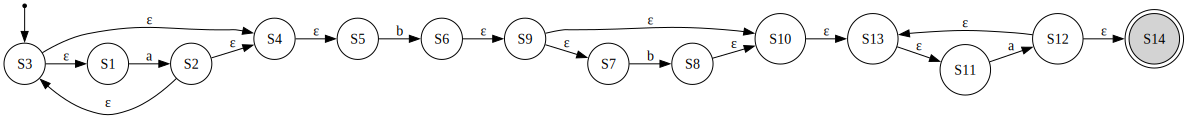

3. Converting NFA to DFA...
   -> Generated DFA with 5 states.
4. Visualizing DFA...
   -> Image saved to: dfa_graph.png
5. DFA JSON Output:
{
    "startingState": "S0",
    "S0": {
        "isTerminatingState": false,
        "a": "S1",
        "b": "S2"
    },
    "S1": {
        "isTerminatingState": false,
        "a": "S1",
        "b": "S2"
    },
    "S2": {
        "isTerminatingState": false,
        "a": "S3",
        "b": "S4"
    },
    "S3": {
        "isTerminatingState": true,
        "a": "S3"
    },
    "S4": {
        "isTerminatingState": false,
        "a": "S3"
    }
}
   -> Saved to json file
Minimized DFA has 4 states.
4. Visualizing Min-DFA...
   -> Image saved to: min_dfa_graph.png
5. MIN_DFA JSON Output:
{
    "startingState": "S1",
    "S0": {
        "isTerminatingState": false,
        "a": "S3"
    },
    "S1": {
        "isTerminatingState": false,
        "a": "S1",
        "b": "S2"
    },
    "S2": {
        "isTerminatingState": false,
        "a": "S

In [1]:
import DFA_Builder
DFA_Builder.BuildDFA("nfa/sample_4.json", "DFA/sample_3_DFA.json", "MinDFA/sample_3_MinDFA.json")